<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/Week%2010/MIS710_Lab10_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **MIS710 Lab 10 Week 10**
Author: Associate Professor Lemai Nguyen

Objectives: 
1. To learn text analytics and NLP basics
2. To apply the basic skills on the well-known Internet Movie Database developed by Stanford researcher Andrew Maas.
3. To apply the basic skills on another review dataset.
4. To learn basic MLOps: saving your model and loading and using it later. 

Note: There is a separate MIS710_Lab10_NLP_Deployment where you can load the saved model and apply it to make predictions. 



# **1. Import Libraries and Functions**

Import libraries and functions that are central to this lab**

In [ ]:
# import libraries 
import pandas as pd #for data manipulation and analysis
import numpy as np
 
import seaborn as sns
import matplotlib.pyplot as plt

Import classes and functions for ML tasks 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **2. Case One: IMDb**

**Sentiment analysis**

**Context**
IMDb stands for the Internet Movie Database, which is an online database of information related to films, television programs, and video games. It contains a vast collection of data on various aspects of the entertainment industry, including cast and crew information, production details, plot summaries, and user ratings and reviews.

**Content**
The IMDb dataset has been widely used in sentiment analysis research. The dataset contains 50,000 movie reviews. Each review is labeled as either "positive" or "negative" based on the overall sentiment expressed in the review. 

The dataset consists of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided. 

**Inspiration**
To train and test a sentiment analysis model

**Further information**:
Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011). 

http://ai.stanford.edu/~amaas/data/sentiment/


## **2.1. Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Upload your IMDB file from the unit site. It is not a small file to upload to Github.

In [ ]:
# load dataset
records = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MIS710/IMDb.csv", index_col=None)

In [ ]:
#explore the dataset
print(records)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


## **2.2. Data Preparation, Exploration and Visualisation**

### **Data inspection and cleansing**

* Inspect columns and correct data types
* Detecting and handling missing data


In [ ]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
records.sample(10)

,review,sentiment
34114,"I'll be honest, this is one of the worst movie...",negative
14635,Reading some of the other reviews of this film...,positive
6847,The only reason any of the hundred or so users...,negative
24096,I love movies. I love independent efforts and ...,negative
1798,"""Laugh, Clown Laugh"" released in 1928, stars t...",negative
15143,"I had heard about this movie through a friend,...",negative
23604,"This thing, directed by french sensation Patri...",negative
32710,I had never heard of this one before it turned...,negative
32136,When all we have anymore is pretty much realit...,negative
42656,I've seen worse films. This is bad but at leas...,negative


In [ ]:
records['review'].head(5)

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [ ]:
records['review'].tail(5)

49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, dtype: object

In [ ]:
#Inspect missing data
print(records.isnull().sum())

review       0
sentiment    0
dtype: int64


### **EDA**

* Analyse and visualise the sentiment column

In [ ]:
# Get frequency of positive and negative reviews
sentiment_counts = records['sentiment'].value_counts()
print(sentiment_counts)

positive    25000
negative    25000
Name: sentiment, dtype: int64


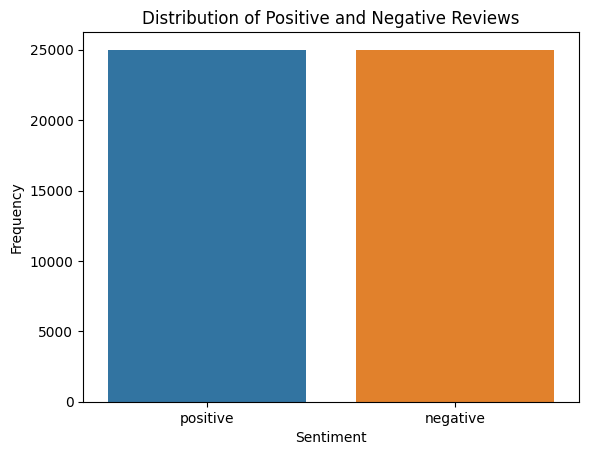

In [ ]:
# Plot bar chart of sentiment counts
sns.countplot(data=records, x='sentiment')
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

### **Text pre-processing**
* Text cleaning: Remove any HTML tags, punctuation, and special characters from the reviews.
* Lowercasing: Convert all text to lowercase to ensure that words with the same spelling but different capitalization are treated as the same word.
* Tokenization: Split the text into individual words or tokens.
* Stopword removal: Remove common words such as "the", "and", "a", etc. that do not add much meaning to the text.
* Stemming/Lemmatization: Reduce words to their base form to normalize the text and group together words with similar meanings.

re is a built-in Python module for working with regular expressions. Regular expressions are a combination of alphanumeric characters and special characters. For example, the . character in a regular expression matches any single character, while the * character matches zero or more occurrences of the preceding character.

#### **Text cleaning**

In [ ]:
#import the Python module re to work with regular expressions
import re

The re.sub() method takes three arguments:

1.   The regular expression pattern to search for.
2.   The replacement string to use for each match of the pattern.
3. The input string to perform the substitution on.

Let's define our clean_text funtion that cleans a given text and returned the cleaned version of it. 

In [ ]:
# Define function to clean text
def clean_text(text):
  # Remove HTML tags
  text = re.sub(r'<.*?>', '', text)
  # Remove punctuation and special characters
  text = re.sub(r'[^\w\s]', '', text)
  # Remove extra whitespace
  text = re.sub(r'\s+', ' ', text).strip()
  return text

* The . (dot) metacharacter matches any single character except for a newline character. 
* The * (asterisk) metacharacter matches zero or more occurrences of the preceding character or group. 

* \w matches any word character, which  includes all alphabetic characters (both upper- and lowercase) and digits, and the underscore character.

* \s matches any whitespace character, which includes spaces, tabs, newlines, and other types of whitespace.

* \s+ matches one or more consecutive whitespace characters. The + (plus) is a metacharacter that means "one or more occurrences of the preceding pattern".

We have defined the clean_text function, now let's write your code for the whole reviews to apply it.

Pandas DataFrame apply() function can be used to apply a function along an axis. We can direct  the column ['review'] to apply the clean_text function. It will apply the function for all values in this column. 
https://www.w3schools.com/python/pandas/ref_df_apply.asp

In [ ]:
#let's get reviews to run clean_text
records['review']= records['review'].apply(clean_text)

In [ ]:
#You can check to have a feel:
records['review'][3]

'Basically theres a family where a little boy Jake thinks theres a zombie in his closet his parents are fighting all the timeThis movie is slower than a soap opera and suddenly Jake decides to become Rambo and kill the zombieOK first of all when youre going to make a film you must Decide if its a thriller or a drama As a drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film I expected to see a BOOGEYMAN similar movie and instead i watched a drama with some meaningless thriller spots3 out of 10 just for the well playing parents descent dialogs As for the shots with Jake just ignore them'

#### **Lowercasing**

In [ ]:
#define the lowercasing function to turn all letters into lowercases.
def lowercasing(text):
  # Convert to lowercase
  text = text.lower()
  return text

**Task 1**: apply this function on the Review column in the same way we have done with the clean_text function. Do it yourself! 

In [ ]:
# let's get reviews to run lowercasing


#### **Tokenization, Stemming and Lemmatization**

* Tokenization breaks the text into individual words or tokens, and then stemming/lemmatization is applied on each token individually to obtain their root form.

* Stemming can help in reducing  words to their root form, which can help in reducing the number of unique words and therefore reducing the size of the vocabulary. For example: studies, study, studied, studying -> study

* Lemmatization reduces a word to its base or dictionary form, which can improve the accuracy of the analysis. By doing both stemming and lemmatization, we can get the benefits of both techniques and improve the overall performance of the sentiment analysis model.

NLTK (Natural Language Toolkit) is a Python library used for natural language processing (NLP) tasks such as tokenization, stemming, lemmatization, part-of-speech tagging, and more.

In [ ]:
#import NLTK and functions for Tokenization, Stemming and Lemmatization
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

#import NLTK stopwords from its corpus
from nltk.corpus import stopwords

Punkt and WordNet are both modules in the Natural Language Toolkit (nltk) library in Python for natural language processing tasks.

* Punkt is a module used for tokenization. The Punkt module is trained on large corpora and uses unsupervised learning algorithms to tokenize sentences effectively even when presented with challenging text.

* WordNet is a large lexical database of English words for lemmatization.

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# define stopwords without negation words
stop_words = set(stopwords.words('english'))
negation_words = {'no', 'not', 'nor', 'neither', 'none', 'never'}
filtered_words = [word for word in stop_words if word not in negation_words]

In [ ]:
#define a function to perform tokenization, stemming and lemmatization
def tokenize_stem_lemmatize(text):
  #tokenization
  tokens = nltk.word_tokenize(text.lower())
    
  #initialize stemmer and lemmatizer  
  stemmer = PorterStemmer()
  lemmatizer = WordNetLemmatizer()

  #perform stemming and lemmatization 
  stemmed_tokens = [stemmer.stem(token) for token in tokens]
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens if token not in filtered_words and token.lower() not in negation_words]
  return ' '.join(lemmatized_tokens)

**Task 2.** Apply the tokenize_stem_lemmatize function on the cleaned and lowercased reviews. Do it yourself. 

Warning: This may take several minutes!

In [ ]:
# Tokenize, stem, and lemmatize the review text
# save the result in processed_text = 

In [ ]:
#now you can see the effect:
processed_text

0        one review ha mention watch 1 oz episod youll ...
1        wonder littl product film techniqu veri unassu...
2        thought thi wa wonder way spend time hot summe...
3        basic famili littl boy jake think zombi hi clo...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought thi movi right good job wasnt creativ ...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    im go disagre previou comment side maltin thi ...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 50000, dtype: object

#### **Vectorization**

A vectorizer is a process of converting textual data into numerical vectors that can be used as input for machine learning algorithms.

Using a bag-of-words model, a vectorizer counts the frequency of each word in a document and represents the document as a vector of word frequencies.

The function CountVectorizer converts a collection of text documents to a matrix of token counts.

This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Create the vectorizer object and fit on the corpus
vectorizer = CountVectorizer()
vectorized_text=vectorizer.fit_transform(processed_text)

**Optional:** You can apply n-gram vectorisation by specifying a range ngram_range=(min, max). It may take a shortwhile.

In [ ]:
vectorizer = CountVectorizer()
vectorizer = CountVectorizer(ngram_range=(2,2))
vectorized_text = vectorizer.fit_transform(processed_text)

In [ ]:
# Get the list of features (i.e., words)
features = vectorizer.vocabulary_

# List the first 20 words
print(list(features)[:20])

['one review', 'review ha', 'ha mention', 'mention watch', 'watch oz', 'oz episod', 'episod youll', 'youll hook', 'hook right', 'right thi', 'thi exactli', 'exactli happen', 'happen meth', 'meth first', 'first thing', 'thing struck', 'struck oz', 'oz wa', 'wa brutal', 'brutal unflinch']


You can now split the vectorised_text and built and test your classifier.

Alternatively, we can split the pre-processed dataset first then apply vectorisation. As I want to display the prep-processed review (not vectorised), labels and predictions.

### **Feature selection**

In [ ]:
X=processed_text
y=records['sentiment']

### **Data splitting**

**Task 3**: Write your own split code 

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

#write your code below to split data:



In [ ]:
X_train

21850    saw thi movi brief run art hous cinema 69 foun...
29191    thing make fire even appeal watch apart magic ...
45175    ok 11 year ago awesom funni movi mask came eve...
17891    youv heard said live everi moment last whether...
7512     horror stori alright perhap know real monster ...
                               ...                        
39427    karl jr hi dad run armi remot island captur tr...
38620    metaphor fli fled thi steam wateri stool film ...
38817    well thi movi start funni quickli deterior tho...
47558    believ anyon give thi film good rate addit ter...
22041    thi could well worst film ive ever seen despit...
Name: review, Length: 40000, dtype: object

**Task 4**: Write your own code to vectorise X_test

In [ ]:
# Create vector representations of the text data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

# Vectorise X_train
X_train_vec = vectorizer.fit_transform(X_train)

# Write your code below to vectorise X_test


In [ ]:
print('Trainning set:', len(y_train))
print('Testing set:', len(y_test))

Trainning set: 40000
Testing set: 10000


Now we have turned the reviews (in training and test) into a sparse matrix.

Let's practice Python skils:
**itertools** is a module in Python's standard library that provides various functions to work with iterators and iterable objects.

In [ ]:
import itertools 
vocabulary = vectorizer.vocabulary_
#size of the vocabulary
print("Size of vocabulary:", len(vocabulary))
# print the first 10 words in the vocabulary
print(list(itertools.islice(vocabulary.keys(), 10)))

Size of vocabulary: 156040
['saw', 'thi', 'movi', 'brief', 'run', 'art', 'hous', 'cinema', '69', 'found']


The function **unique**  in pandas returns the unique values and frequencies from a series. 

In [ ]:
def check_dataset(arg1, mydataset):
# Get frequency of positive and negative reviews
  unique, frequency = np.unique(mydataset, return_counts = True)
# print unique values array
  print(arg1, unique)
# print frequency array
  print(arg1, frequency)

check_dataset('Training: ', y_train)
check_dataset('Testing: ', y_test)

Training:  ['negative' 'positive']
Training:  [20039 19961]
Testing:  ['negative' 'positive']
Testing:  [4961 5039]


## **2.3. Sentiment Analysis**

### **2.3.1 Logistric regression model**

#### Model building

**Task 5**: Write your own code to fit a logistic regression classifier lr. Hint: use X_train_vec

In [ ]:
# Train logistic regression model
lr = LogisticRegression(penalty='l2', C=2, solver='liblinear', max_iter=1000, random_state=2023)

#write your code below to fit the model


LogisticRegression(C=2, max_iter=1000, random_state=2023, solver='liblinear')

####Performance evaluation
* Classification metrics and report
* Confusion matrix 
* TPR and FPR
* ROC and AUC


In [ ]:
# Evaluate model
y_pred_lr = lr.predict(X_test_vec)

In [ ]:
#get predicted probabilities for the main class
y_pred_probs_lr = lr.predict_proba(X_test_vec)
y_pred_probs_lr = y_pred_probs_lr[:, 1]

In [ ]:
#join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_lr})

#join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.sample(20)

,review,Actual,Predicted
9461,cant say whether postwwii british comedi produ...,positive,positive
3041,know sometim realli realli corni act amaz meli...,positive,positive
35168,intellig summari isnt itif mad max wa someth s...,negative,negative
27360,thi wa without doubt worst movi ever see yet o...,negative,negative
7732,young man name court love everyon hi pain bloo...,positive,positive
37704,thi film surfac would seem jedgar hoover give ...,positive,positive
38234,cant see everyon see thi movi act aw choic mus...,negative,negative
38107,befor went polit public servic glenda jackson ...,positive,positive
41916,rememb see thi film wa good alway say film goo...,negative,negative
41038,thi quit unusu uniqu littl western made mostli...,positive,positive


**Task 6**: generate the confusion matrix and classification report.

In [ ]:
#write your code below: 


#print confusion matrix and evaluation report
print(cm)
print(classification_report(y_test, y_pred_lr))

[[4365  596]
 [ 554 4485]]
              precision    recall  f1-score   support

    negative       0.89      0.88      0.88      4961
    positive       0.88      0.89      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.89      0.88     10000



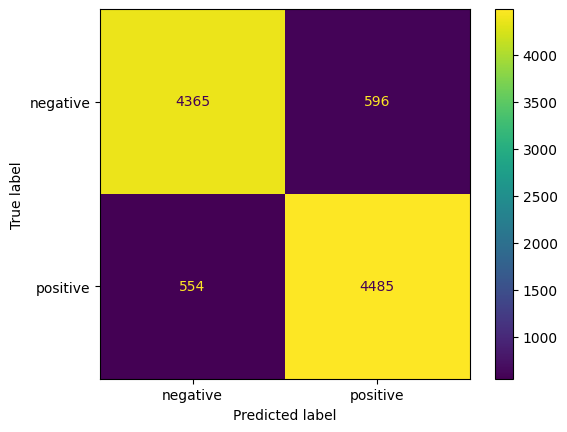

In [ ]:
#import classes to display Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.show()

In [ ]:
# Computer TN FP FN TP
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()

# Compute FPT and TPR for this k
tpr_lr = tp / (tp + fn)
fpr_lr = fp / (fp + tn)

print('True Positive Rate: ', '%.3f' % tpr_lr)
print('False Positive Rate: ', '%.3f' % fpr_lr)


True Positive Rate:  0.890
False Positive Rate:  0.120


In [ ]:
from sklearn.preprocessing import LabelEncoder

# encode labels as 0s and 1s so you can compute fpr and tfr for thresholds 
le = LabelEncoder()
y_true = le.fit_transform(y_test)

AUC: 0.947


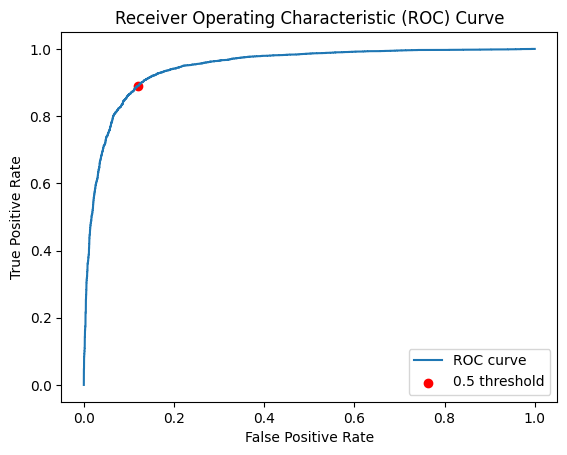

In [ ]:
#get fpr and tpr and plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the false positive rate, true positive rate, and threshold
fprs_lr, tprs_lr, thresholds = roc_curve(y_true, y_pred_probs_lr)
auc_lr= metrics.auc(fprs_lr, tprs_lr)
print('AUC:', '%.3f' % auc_lr)

# plot the ROC curve and the best point
plt.plot(fprs_lr, tprs_lr, label='ROC curve')
plt.scatter(x=fpr_lr, y=tpr_lr, marker='o', color='red', label='0.5 threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

####Find best threshold

In [ ]:
from sklearn.metrics import accuracy_score
# Find the best threshold based on accuracy
accuracy = []
for threshold in thresholds:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_pred_probs_lr]
    accuracy.append(accuracy_score(y_true, y_pred_t))
best_threshold = thresholds[accuracy.index(max(accuracy))]

print(best_threshold)

0.4020507033937284


In [ ]:
#get predicted probabilities for the best threshold
y_pred_best_lr = (lr.predict_proba(X_test_vec)[:,1] >= best_threshold).astype(bool)

print(y_pred_best_lr)

[ True  True False ... False  True  True]


In [ ]:
# Computer TN FP FN TP for the best threshold
tn_bestThreshold, fp_bestThreshold, fn_bestThreshold, tp_bestThreshold = confusion_matrix(y_true, y_pred_best_lr).ravel()
print(confusion_matrix(y_true, y_pred_best_lr))
# Compute FPT and TPR for this k
tpr_bestThreshold = tp_bestThreshold / (tp_bestThreshold + fn_bestThreshold)
fpr_bestThreshold = fp_bestThreshold / (fp_bestThreshold + tn_bestThreshold)

print('True Positive Rate: ', '%.3f' % tpr_bestThreshold)
print('False Positive Rate: ', '%.3f' % fpr_bestThreshold)

[[4295  666]
 [ 468 4571]]
True Positive Rate:  0.907
False Positive Rate:  0.134


### **2.3.2 ANN**

#### Model building

In [ ]:
# create an MLP classifier with 2 hidden layers 
ann_clf = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=2023, early_stopping=True)

# train the classifier on the training data
ann_clf.fit(X_train_vec, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(32, 16), max_iter=1000,
              random_state=2023)

#### Performance evaluation
* Classification metrics and report
* Confusion matrix
* TPR and FPR
* ROC and AUC




**Task 7**: Write your code to make predictions for the test data record the results into y_pred_ann

In [ ]:
# write your code to evaluate the classifier on the testing data


#get predicted probabilities for the main class
y_pred_probs_ann = ann_clf.predict_proba(X_test_vec)
y_pred_probs_ann = y_pred_probs_ann[:, 1]


In [ ]:
#print confusion matrix and evaluation report
cm=confusion_matrix(y_test, y_pred_ann)
print(cm)
print(classification_report(y_test, y_pred_ann))

[[4391  570]
 [ 473 4566]]
              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



**Task 8:** Write your code to calculate AUC

In [ ]:
# get fpr, tpr and thresholds
fpr_ann, tpr_ann, thresholds = roc_curve(y_true, y_pred_probs_ann)

#write your code to compute AUC


print('AUC:', '%.3f' % auc_ann)

AUC: 0.954


### **2.3.3 Model comparision**

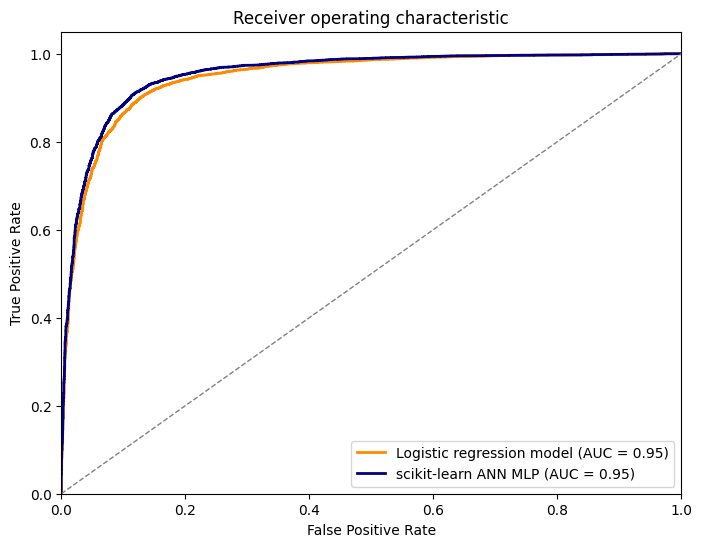

Logistic regression model AUC: 0.947
scikit-learn ANN MLP AUC: 0.954


In [ ]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fprs_lr, tprs_lr, color='darkorange', lw=2, label='Logistic regression model (AUC = %0.2f)' % auc_lr)
plt.plot(fpr_ann, tpr_ann, color='navy', lw=2, label='scikit-learn ANN MLP (AUC = %0.2f)' % auc_ann)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Compute and print AUC
print('Logistic regression model AUC:','%.3f' %  auc_lr)
print('scikit-learn ANN MLP AUC:', '%.3f' %auc_ann)

**Task 9**: Which model you'd choose and why?

## **3. ML Operationalisation**

### **3.1 Import pickle and save the selected model**

In [ ]:
import pickle

Save your lr model to your selected folder

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/MIS710/IMDB_lr_clf.pickle'

with open(path, 'wb') as f:
    pickle.dump(lr, f)

**Task 10:** Write code to save your ann model

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/MIS710/IMDB_ann_clf.pickle'

#write your code below to save  the ann model


Note we didn't specify any vocabulary when vectorising the processed reviews. The vectoriser created a vocabulary specifically for the IMDB dataset.

As we want to apply our model(s) to new reviews, we need to save the load the vocabulary as well. 

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/MIS710/IMDB_vocabulary.pkl', 'wb') as file:
    pickle.dump(vectorizer.vocabulary_, file)

You can also download the file

In [ ]:
from google.colab import files

In [ ]:
files.download('/content/drive/MyDrive/Colab Notebooks/MIS710/IMDB_ann_clf.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **3.2 Load and use the model**

**Unpickle**: Let's load our model and vocabulary and use them to  perform a sentiment analysis.

In [ ]:
with open(path, 'rb') as f:
    model = pickle.load(f)


In [ ]:
# Load the vocabulary used to preprocess the training data
with open('/content/drive/MyDrive/Colab Notebooks/MIS710/IMDB_vocabulary.pkl', 'rb') as file:
    vocabulary = pickle.load(file)

In [ ]:
#size of the vocabulary
print("Size of vocabulary:", len(vocabulary))

Size of vocabulary: 156040


As you see, we now have a vocabulary of 156040 words. Hope this is large enough and includes all words from the new reviews. If we don't pickle it, we don't have the same matrix space to apply the new reviews. 

**Load new data**. I have collected 14 reviews about Dr Cha, a 2023 Kdrama from youtube. We load new reviews from the 'production line'.



In [ ]:
new_reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIS710/DrCha_reviews.csv')
print(new_reviews)

                                               review sentiment
0   I just watched the first episode and it’s 10/1...  positive
1   this is going to be absolutely hilarious I can...  positive
2   Accidentally watched the first episode, it was...  positive
3                          This actress is hilarious!  positive
4                             Looks very entertaining  positive
5                 annoying unnecesarry romantic scene  negative
6                           I love this drama so much  positive
7   Too convoluted and over dramatic. Dr Cha neede...  negative
8   Really good to see Km Byung Chul in a more com...  positive
9   disappointed if the writers keep this marriage...  negative
10  I'm addicted to this movie, but If she doesn't...  positive
11      I love it. Can't wait to see the next episode  positive
12  The movie really disappoint me, his mother wil...  negative
13  Loved the first 2 episodes and excited for the...  positive


In practice, we should create a data pipeline to automate the pre-process of new data. Let's repeat the pre-processing steps for now.

**You can skip all import and def functions and jump to the Pre-processing steps below**

In [ ]:
#import the Python module re to work with regular expressions
import re

In [ ]:
# Define function to clean text
def clean_text(text):
  # Remove HTML tags
  text = re.sub(r'<.*?>', '', text)
  # Remove punctuation and special characters
  text = re.sub(r'[^\w\s]', '', text)
  # Remove extra whitespace
  text = re.sub(r'\s+', ' ', text).strip()
  return text

In [ ]:
def lowercasing(text):
  # Convert to lowercase
  text = text.lower()
  return text

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# define stopwords without negation words
stop_words = set(stopwords.words('english'))
negation_words = {'no', 'not', 'nor', 'neither', 'none', 'never'}
filtered_words = [word for word in stop_words if word not in negation_words]

In [ ]:
#define a function to perform tokenization, stemming and lemmatization
def tokenize_stem_lemmatize(text):
  #tokenization
  tokens = nltk.word_tokenize(text.lower())
    
  #initialize stemmer and lemmatizer  
  stemmer = PorterStemmer()
  lemmatizer = WordNetLemmatizer()

  #perform stemming and lemmatization 
  stemmed_tokens = [stemmer.stem(token) for token in tokens]
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens if token not in filtered_words and token.lower() not in negation_words]
  return ' '.join(lemmatized_tokens)

**Pre-processing steps**

In [ ]:
# Apply the clean_text function to the 'review' column 
new_reviews['review'] = new_reviews['review'].apply(clean_text)

In [ ]:
new_reviews['review']=new_reviews['review'].apply(lowercasing)

In [ ]:
# Tokenize, stem, and lemmatize the review text
processed_text = new_reviews['review'].apply(tokenize_stem_lemmatize)


In [ ]:
processed_text

0     watch first episod 1010 im love mom also left ...
1         thi go absolut hilari cant wait synopsi funni
2     accident watch first episod wa good couldnt st...
3                                    thi actress hilari
4                                   look veri entertain
5                        annoy unnecesarri romant scene
6                                   love thi drama much
7     convolut dramat dr cha need assert confid fema...
8               realli good see km byung chul comed set
9         disappoint writer keep thi marriag togeth end
10    im addict thi movi doesnt divorc husband watch...
11                       love cant wait see next episod
12    movi realli disappoint hi mother pain find hi ...
13                    love first 2 episod excit remaind
Name: review, dtype: object

In [ ]:
# Create a vectorised representation of the text data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=vocabulary)
X_vec = vectorizer.fit_transform(processed_text)


In [ ]:
# Evaluate model
y_pred = model.predict(X_vec)

In [ ]:
#join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':new_reviews['sentiment'], 'Predicted':y_pred})

#join X_test with the new dataframe
inspection=pd.concat([new_reviews['review'],inspection], axis=1)

inspection

,review,Actual,Predicted
0,i just watched the first episode and its 1010 ...,positive,positive
1,this is going to be absolutely hilarious i can...,positive,positive
2,accidentally watched the first episode it was ...,positive,positive
3,this actress is hilarious,positive,positive
4,looks very entertaining,positive,positive
5,annoying unnecesarry romantic scene,negative,negative
6,i love this drama so much,positive,positive
7,too convoluted and over dramatic dr cha needed...,negative,negative
8,really good to see km byung chul in a more com...,positive,positive
9,disappointed if the writers keep this marriage...,negative,negative


**Task 11**: write your code to print confusion matrix and evaluation report

In [ ]:
#print confusion matrix and evaluation report
y_test=new_reviews['sentiment']
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[4 0]
 [1 9]]
              precision    recall  f1-score   support

    negative       0.80      1.00      0.89         4
    positive       1.00      0.90      0.95        10

    accuracy                           0.93        14
   macro avg       0.90      0.95      0.92        14
weighted avg       0.94      0.93      0.93        14




**Task 12**: Optional tasks

* You can collect movie reviews and analyse emotions expressed, but make sure you do the same preprocessing first.
* Open the Deployment ipynb to Load the pickled model and vocabulary, and apply the model to conduct a sentiment analysis on DrCha reviews. 
* Collect more DrCha reviews or reviews of any other movies and run a sentiment analysis using your pickled model. 

# **Congratulations**
Well done, you have completed your first sentiment analysis.
Now, let's do another exercise! 



# **3. Case Two: Women's E-Commerce Clothing Reviews**

**Sentiment analysis**

**Context**
This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

**Content**
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

* Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
* Age: Positive Integer variable of the reviewers age.
* Title: String variable for the title of the review.
* Review Text: String variable for the review body.
* Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
* Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
* Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
* Division Name: Categorical name of the product high level division.
* Department Name: Categorical name of the product department name.
* Class Name: Categorical name of the product class name.

**Inspiration**
For the purpose of Topic 10, let's predict recommendation: Yes or No based on the Title and Review Text.

Anonymous but real source

**Further information**:

https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

https://www.researchgate.net/publication/323545316_Statistical_Analysis_on_E-Commerce_Reviews_with_Sentiment_Classification_using_Bidirectional_Recurrent_Neural_Network 

## **3.1 Data Loading**

In [ ]:
url='https://raw.githubusercontent.com/VanLan0/MIS710-ML/main/Datasets/Reviews.csv'


In [ ]:
# load dataset
records = pd.read_csv(url, index_col=None)

In [ ]:
records.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


## **3.2. Data Preparation, Exploration and Visualisation**

### **Data cleansing**

* Inspect columns and correct data types
* Detecting and handling missing data


**Detect missing data**

In [ ]:
records.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

**Feature engineering and selection**



In [ ]:
records=records.iloc[:, [2, 3, 4, 5, 6]]

Let's merge review title and review text columns, there is no need to keep them separately. By merging them, we can remove some missing values in either column.

In [ ]:
#create a new column by cpncatenating title and review text
records['Review'] = records.apply(lambda row: str(row['Title']) + str(row['Review Text']), axis=1)

In [ ]:
records.drop(columns=['Title', 'Review Text'], axis=1, inplace=True )

We don't have anymore missing data!

In [ ]:
records.isnull().sum()

Age                0
Rating             0
Recommended IND    0
Review             0
dtype: int64

In [ ]:
#rename the recommended IND, this is the target for classification
records = records.rename(columns={'Recommended IND': 'Recommended'})

### **EDA**

* Analyse and visualise the sentiment column

In [ ]:
# Get frequency of positive and negative reviews
sentiment_counts = records['Recommended'].value_counts()
print(sentiment_counts)

1    19314
0     4172
Name: Recommended, dtype: int64


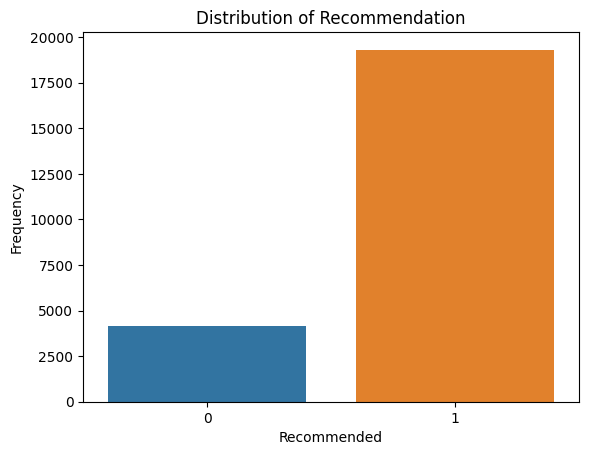

In [ ]:
# Plot bar chart of sentiment counts
sns.countplot(data=records, x='Recommended')
plt.title('Distribution of Recommendation')
plt.xlabel('Recommended')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Age'>

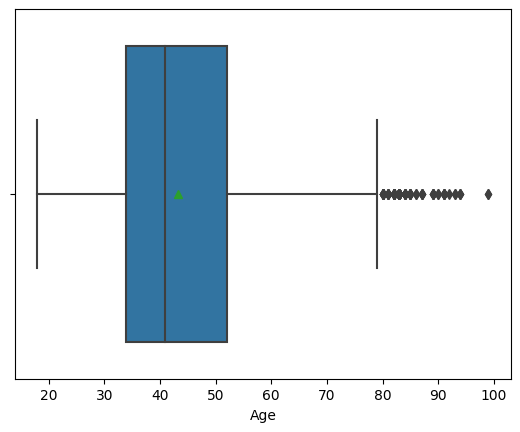

In [ ]:
sns.boxplot(data=records, x='Age',showmeans=True)

<ipython-input-15-7857e5384bdf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(records['Age'],bins=50)


<Axes: xlabel='Age', ylabel='Density'>

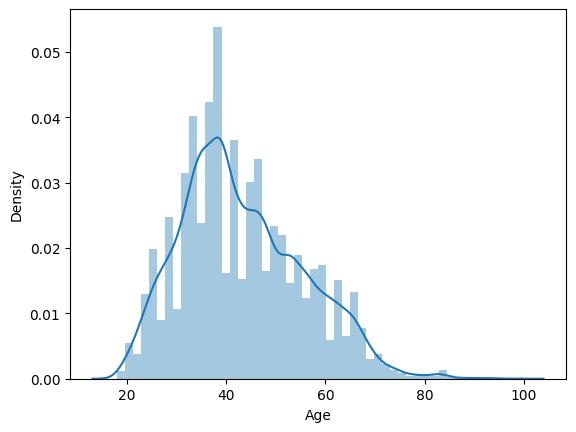

In [ ]:
sns.distplot(records['Age'],bins=50)

In [ ]:
# Map the values in column "Recommended" to "No" and "Yes"
records['Recommended_YN'] = records['Recommended'].map({0: 'No', 1: 'Yes'})

<Axes: xlabel='Age', ylabel='Recommended_YN'>

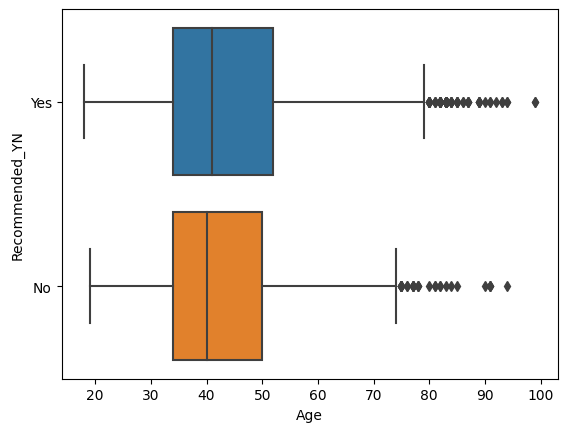

In [ ]:
sns.boxplot(data=records, x='Age', y='Recommended_YN')

<Axes: xlabel='Age', ylabel='Density'>

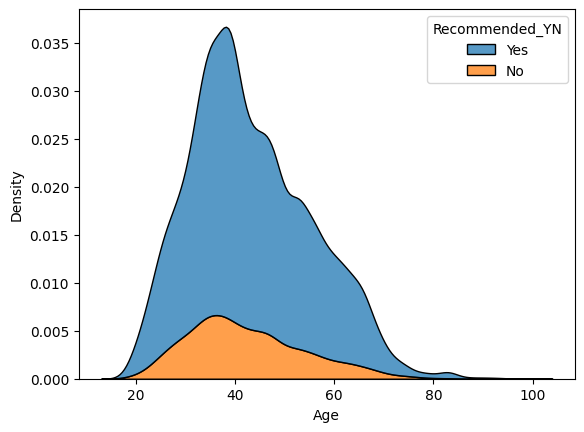

In [ ]:
sns.kdeplot(data=records, x='Age', hue='Recommended_YN', multiple='stack')

<Axes: xlabel='Rating', ylabel='count'>

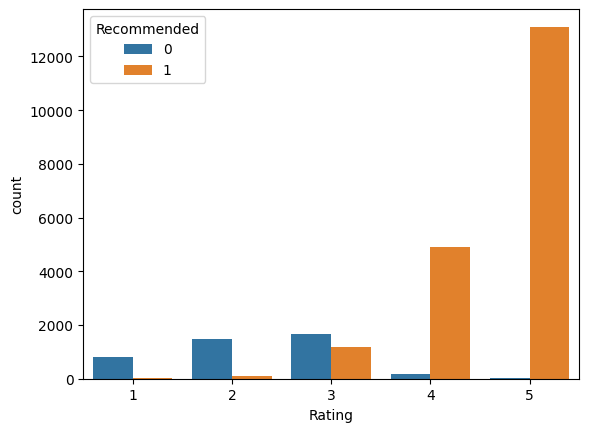

In [ ]:
sns.countplot(data=records, x='Rating', hue='Recommended')

### **Text pre-processing**
* Text cleaning: Remove any HTML tags, punctuation, and special characters from the reviews.
* Lowercasing: Convert all text to lowercase to ensure that words with the same spelling but different capitalization are treated as the same word.
* Tokenization: Split the text into individual words or tokens.
* Stopword removal: Remove common words such as "the", "and", "a", etc. that do not add much meaning to the text.
* Stemming/Lemmatization: Reduce words to their base form to normalize the text and group together words with similar meanings.

re is a built-in Python module for working with regular expressions. Regular expressions are a combination of alphanumeric characters and special characters. For example, the . character in a regular expression matches any single character, while the * character matches zero or more occurrences of the preceding character.

#### **Text cleaning**

In [ ]:
import re

The re.sub() method takes three arguments:

1.   The regular expression pattern to search for.
2.   The replacement string to use for each match of the pattern.
3. The input string to perform the substitution on.

In [ ]:
# Define function to clean text
def clean_text(text):
  # Remove HTML tags
  text = re.sub(r'<.*?>', '', text)
  # Remove punctuation and special characters
  text = re.sub(r'[^\w\s]', '', text)
  # Remove extra whitespace
  text = re.sub(r'\s+', ' ', text).strip()
  # Remove the string 'nan' from column "Text", as we merged columns with missing texts together
  text = re.sub(r'nan', '', text)
  return text

* The . (dot) metacharacter matches any single character except for a newline character. 
* The * (asterisk) metacharacter matches zero or more occurrences of the preceding character or group. 

* \w matches any word character, which  includes all alphabetic characters (both upper- and lowercase) and digits, and the underscore character.

* \s matches any whitespace character, which includes spaces, tabs, newlines, and other types of whitespace.

* \s+ matches one or more consecutive whitespace characters. The + (plus) is a metacharacter that means "one or more occurrences of the preceding pattern".

**Task 13:** Write code for records['Review'] to apply clean_text

In [ ]:
# Apply the clean_text function to the 'review' column 


In [ ]:
def lowercasing(text):
  # Convert to lowercase
  text = text.lower()
  return text

**Task 14:** Write code for records['Review'] to apply lowercasing

#### **Tokenization, Stemming and Lemmatization**

* Tokenization breaks the text into individual words or tokens, and then stemming/lemmatization is applied on each token individually to obtain their root form.

* Stemming can help in reducing  words to their root form, which can help in reducing the number of unique words and therefore reducing the size of the vocabulary. For example: studies, study, studied, studying -> study

* Lemmatization reduces a word to its base or dictionary form, which can improve the accuracy of the analysis. By doing both stemming and lemmatization, we can get the benefits of both techniques and improve the overall performance of the sentiment analysis model.

NLTK (Natural Language Toolkit) is a Python library used for natural language processing (NLP) tasks such as tokenization, stemming, lemmatization, part-of-speech tagging, and more.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

Punkt and WordNet are both modules in the Natural Language Toolkit (nltk) library in Python for natural language processing tasks.

* Punkt is a module used for tokenization. The Punkt module is trained on large corpora and uses unsupervised learning algorithms to tokenize sentences effectively even when presented with challenging text.

* WordNet is a large lexical database of English words for lemmatization.

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Get stopwords
stop_words = set(stopwords.words('english'))
#keep negation words because removing them may result in information loss
negation_words = {'no', 'not', 'nor', 'neither', 'none', 'never'}

filtered_words = [word for word in stop_words if word not in negation_words]

In [ ]:
#define a function to perform tokenization, stemming and lemmatization
def tokenize_stem_lemmatize(text):
  #tokenization
  tokens = nltk.word_tokenize(text.lower())
    
  #initialize stemmer and lemmatizer  
  stemmer = PorterStemmer()
  lemmatizer = WordNetLemmatizer()

  #perform stemming and lemmatization 
  stemmed_tokens = [stemmer.stem(token) for token in tokens]
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens if token not in filtered_words and token.lower() not in negation_words]
  return ' '.join(lemmatized_tokens)

**Task 15:** Write code to tokenize, stem, and lemmatize the Review column

In [ ]:
# Tokenize, stem, and lemmatize the text



In [ ]:
# Create a new DataFrame that contains the processed text and Age columns
X = pd.DataFrame({'Processed_Text': processed_text, 'Age': records['Age'], 'Rating': records['Rating']})

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Processed_Text  23486 non-null  object
 1   Age             23486 non-null  int64 
 2   Rating          23486 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 550.6+ KB


In [ ]:
#X=processed_text
y=records['Recommended']

#### **Vectorization**

A vectorizer is a process of converting textual data into numerical vectors that can be used as input for machine learning algorithms.

Using a bag-of-words model, a vectorizer counts the frequency of each word in a document and represents the document as a vector of word frequencies.

### **Data splitting**

**Task 15:** Write code to split data, don't forget to use stratify=y

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split



In [ ]:
X_train

,Processed_Text,Age,Rating
22625,love 56 34a282936 size small wa great fit moss...,44,5
15763,veri cute run largei bought thi store without ...,42,4
22642,boho chiclov thi dress necklin gorgeou,39,5
15436,uniqu peplum sweater soft comfi fabulousdark b...,44,5
3812,xl run smallwould love thi skirt xl closer siz...,33,3
...,...,...,...
7629,comfort stylish great fitfind boyfriend jean a...,65,5
14784,hopedi wish fit littl better unfortun littl ti...,57,1
19131,gorgeou timeless trenchfirst im navi person mu...,57,5
15572,dreami soft sweaterveri warm snuggli gorgeou c...,45,5


**Task 16:** Write code to vectorise X_test_vec

In [ ]:
# Create a vector representation of the text data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train['Processed_Text'])

#Write code to vectorise X_test_vec below


We have vectorised the Reviews, now add the other columns Age and Rating back

In [ ]:
# get the vocabulary of the corpus
feature_names = list(vectorizer.vocabulary_.keys())

In [ ]:
# Convert the sparse matrix to a dense matrix
X_train_vec = X_train_vec.toarray()

# make X_train_vec into columns
X_train_vec = pd.DataFrame(X_train_vec, columns=feature_names)
# merge the vectorized data with the Age column and fix indices
X_train_vec['Age'] = X_train['Age'].reset_index(drop=True)
X_train_vec['Rating'] = X_train['Rating'].reset_index(drop=True)

# View the vectorized text and 'age' column
print(X_train_vec.head())

   love  56  34a282936  size  small  wa  great  fit  moss  color  ...  \
0     0   0          0     0      0   0      0    0     0      0  ...   
1     0   0          0     0      0   0      0    0     0      0  ...   
2     0   0          0     0      0   0      0    0     0      0  ...   
3     0   0          0     0      0   0      0    0     0      0  ...   
4     0   0          0     0      0   0      0    0     0      0  ...   

   easybought  leggingsmay  whatnot  yolk  contour  fitfind  contriv  \
0           0            0        0     0        0        0        0   
1           0            0        0     0        0        0        0   
2           0            0        0     0        0        0        0   
3           0            0        0     0        0        0        0   
4           0            0        0     0        0        0        0   

   trenchfirst  Age  Rating  
0            0   44       5  
1            0   42       4  
2            0   39       5  
3       

**Task 17:** We have vectorised X_test as T_text_vec, now modify the previous code to add columns Age and Rating to the X_test_vec

In [ ]:
# Convert the sparse matrix to a dense matrix
X_test_vec = X_test_vec.toarray()

# make X_train_vec into columns
X_test_vec = pd.DataFrame(X_test_vec, columns=feature_names)

# Write your code below to merge the vectorized data with the Age and Rating columns and fix indices


# View the vectorized text and 'age' column
print(X_test_vec.head())

   love  56  34a282936  size  small  wa  great  fit  moss  color  ...  \
0     0   0          0     0      0   0      0    0     0      0  ...   
1     0   0          0     0      0   0      0    0     0      0  ...   
2     0   0          0     0      0   0      0    0     0      0  ...   
3     0   0          0     0      0   0      0    0     0      0  ...   
4     0   0          0     1      0   0      0    0     0      0  ...   

   easybought  leggingsmay  whatnot  yolk  contour  fitfind  contriv  \
0           0            0        0     0        0        0        0   
1           0            0        0     0        0        0        0   
2           0            0        0     0        0        0        0   
3           0            0        0     0        0        0        0   
4           0            0        0     0        0        0        0   

   trenchfirst  Age  Rating  
0            0   40       5  
1            0   52       4  
2            0   46       3  
3       

Let's inspect the datasets

In [ ]:
def check_dataset(arg1, mydataset):
# Get frequency of positive and negative reviews
  unique, frequency = np.unique(mydataset, return_counts = True)
# print unique values array
  print(arg1, unique)
# print frequency array
  print(arg1, frequency)

check_dataset('Training: ', y_train)
check_dataset('Testing: ', y_test)

Training:  [0 1]
Training:  [ 3337 15451]
Testing:  [0 1]
Testing:  [ 835 3863]


## **3.3. Sentiment analysis**

### **3.3.1 Logistic regression**

#### Model building

**Task 18**: Write code to initialise and fit a lr model

In [ ]:
# Train logistic regression model



LogisticRegression(C=2, max_iter=1000, random_state=2023, solver='liblinear')

**Task 18**: Make predictions

In [ ]:
# Evaluate model


In [ ]:
#get predicted probabilities for the main class
y_pred_probs_lr = lr.predict_proba(X_test_vec)
y_pred_probs_lr = y_pred_probs_lr[:, 1]

In [ ]:
#join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_lr})

#join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.sample(20)

,Processed_Text,Age,Rating,Actual,Predicted
11771,cute comfortableth blue thi jumpsuit actual li...,28,4,1,1
1593,gorgeou big floralthi beauti dress consid made...,59,4,1,1
5971,cute skirtth fabric wa southwestern look got l...,39,3,1,0
13396,disappointingi built new wardrob around three ...,64,2,0,0
16883,extrem soft comfort fit veri well travel reall...,57,5,1,1
12264,perfect fiti gener wear 27 jean fit perfectli ...,52,5,1,1
7920,satisfiednot great qualiti run bit lose dispro...,52,2,0,0
10289,fun jeanslov new jean fit perfect extrem flatt...,55,5,1,1
19886,great stapl piecelov love love thi jacket im a...,46,5,1,1
5830,good buy anoth pairi bought wear christma part...,40,5,1,1


#### Performance evaluation
* Classification metrics and report
* Confusion matrix 
* TPR and FPR
* ROC and AUC


**Task 19**: Write code to print the confusion matrix and classification report

In [ ]:
#print confusion matrix and evaluation report

print(cm_lr)
print(classification_report(y_test, y_pred_lr))

[[ 647  188]
 [ 127 3736]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       835
           1       0.95      0.97      0.96      3863

    accuracy                           0.93      4698
   macro avg       0.89      0.87      0.88      4698
weighted avg       0.93      0.93      0.93      4698



In [ ]:
# Computer TN FP FN TP
tn_lr, fp_lr, fn_lr, tp_lr = confusion_matrix(y_test, y_pred_lr).ravel()

# Compute FPT and TPR for this k
tpr_lr = tp_lr / (tp_lr + fn_lr)
fpr_lr = fp_lr / (fp_lr + tn_lr)

print('True Positive Rate: ', '%.3f' % tpr_lr)
print('False Positive Rate: ', '%.3f' % fpr_lr)


True Positive Rate:  0.967
False Positive Rate:  0.225


In [ ]:
from sklearn.preprocessing import LabelEncoder

# encode labels as 0s and 1s to calculate true and false positive rates and thresholds
le = LabelEncoder()
y_true = le.fit_transform(y_test)


AUC: 0.974


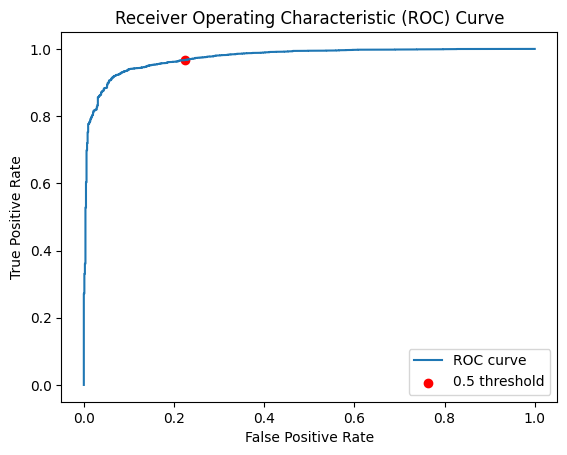

In [ ]:
#get fpr and tpr and plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the false positive rate, true positive rate, and threshold
fprs_lr, tprs_lr, thresholds = roc_curve(y_true, y_pred_probs_lr)
auc_lr=metrics.auc(fprs_lr, tprs_lr)
print('AUC:', '%.3f' % auc_lr)

# plot the ROC curve and the best point
plt.plot(fprs_lr, tprs_lr, label='ROC curve')
plt.scatter(x=fpr_lr, y=tpr_lr, marker='o', color='red', label='0.5 threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Threshold optimisation

Choose a criterion to optimise threshold: for example based on accuracy

In [ ]:
from sklearn.metrics import accuracy_score
# Find the best threshold based on accuracy
accuracy = []
for threshold in thresholds:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_pred_probs_lr]
    accuracy.append(accuracy_score(y_true, y_pred_t))
best_threshold = thresholds[accuracy.index(max(accuracy))]

print(best_threshold)

0.6012703552160357


or based on f1 score

In [ ]:
from sklearn.metrics import f1_score
# Find the best threshold based on F1 score
f1 = []
for threshold in thresholds:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_pred_probs_lr]
    f1.append(f1_score(y_test, y_pred_t))
best_threshold = thresholds[f1.index(max(f1))]

print(best_threshold)

0.4317797391303467


In [ ]:
#get predicted probabilities for the best threshold
y_pred_best = (lr.predict_proba(X_test_vec)[:,1] >= best_threshold).astype(bool)

print(y_pred_best)

[ True  True False ...  True  True  True]


In [ ]:
# Computer TN FP FN TP for the best threshold
tn_bestThreshold, fp_bestThreshold, fn_bestThreshold, tp_bestThreshold = confusion_matrix(y_true, y_pred_best).ravel()
print(confusion_matrix(y_true, y_pred_best))
# Compute FPT and TPR for this k
tpr_bestThreshold = tp_bestThreshold / (tp_bestThreshold + fn_bestThreshold)
fpr_bestThreshold = fp_bestThreshold / (fp_bestThreshold + tn_bestThreshold)

print('True Positive Rate: ', '%.3f' % tpr_bestThreshold)
print('False Positive Rate: ', '%.3f' % fpr_bestThreshold)

[[ 680  155]
 [ 153 3710]]
True Positive Rate:  0.960
False Positive Rate:  0.186


In [ ]:
#print confusion matrix and evaluation report
cm=confusion_matrix(y_test, y_pred_best)
print(cm)
print(classification_report(y_test, y_pred_best))

[[ 680  155]
 [ 153 3710]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       835
           1       0.96      0.96      0.96      3863

    accuracy                           0.93      4698
   macro avg       0.89      0.89      0.89      4698
weighted avg       0.93      0.93      0.93      4698



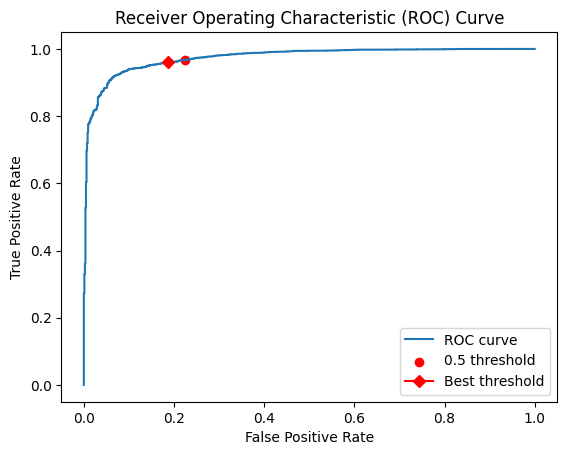

AUC: 0.974


In [ ]:
# plot the ROC curve and the best point
plt.plot(fprs_lr, tprs_lr, label='ROC curve')
plt.scatter(x=fpr_lr, y=tpr_lr, marker='o', color='red', label='0.5 threshold')
plt.plot(fpr_bestThreshold, tpr_bestThreshold, marker='D', color='red', label='Best threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print('AUC:', '%.3f' % auc_lr)

### **3.3.2 ANN**

#### Model building

**Task 20**: Write code to create an ann_clf object and fit it with the training data

In [ ]:
from sklearn.neural_network import MLPClassifier
# create an MLP classifier with 2 hidden layers 


# train the classifier on the training data
ann_clf.fit(X_train_vec, y_train)



MLPClassifier(early_stopping=True, hidden_layer_sizes=(32, 16, 8),
              max_iter=1000, random_state=2023)

#### Performance evaluation

**Task 21**: Write code to make predictions using the test data 

In [ ]:
# evaluate the classifier on the testing data
#y_pred_ann =

#get predicted probabilities for the main class
# y_pred_probs_ann = 


In [ ]:
#print confusion matrix and evaluation report
cm_ann=confusion_matrix(y_test, y_pred_ann)
print(cm)
print(classification_report(y_test, y_pred_ann))

[[ 680  155]
 [ 153 3710]]
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       835
           1       0.94      0.97      0.96      3863

    accuracy                           0.93      4698
   macro avg       0.89      0.85      0.87      4698
weighted avg       0.92      0.93      0.92      4698



In [ ]:
# Computer TN FP FN TP
tn_ann, fp_ann, fn_ann, tp_ann = confusion_matrix(y_test, y_pred_ann).ravel()

# Compute FPT and TPR for this k
tpr_ann = tp_ann / (tp_ann + fn_ann)
fpr_ann = fp_ann / (fp_ann + tn_ann)

print('True Positive Rate: ', '%.3f' % tpr_ann)
print('False Positive Rate: ', '%.3f' % fpr_ann)

True Positive Rate:  0.969
False Positive Rate:  0.273


ANN AUC: 0.966


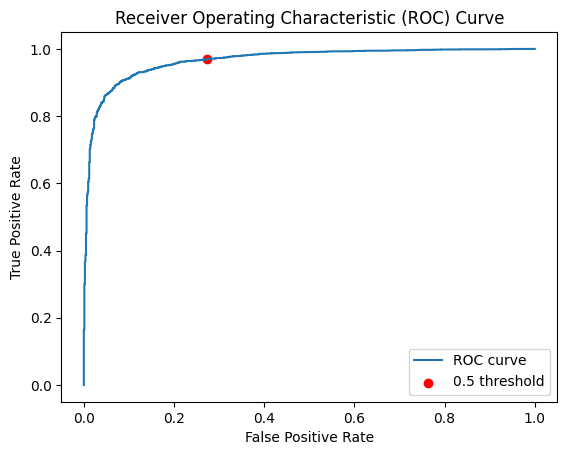

In [ ]:
# Compute the false positive rate, true positive rate, and threshold
fprs_ann, tprs_ann, thresholds = roc_curve(y_true, y_pred_probs_ann)
auc_ann= metrics.auc(fprs_ann, tprs_ann)
print('ANN AUC:', '%.3f' % auc_ann)

# plot the ROC curve and the best point
plt.plot(fprs_ann, tprs_ann, label='ROC curve')
plt.scatter(x=fpr_ann, y=tpr_ann, marker='o', color='red', label='0.5 threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Threshold optimisation

**Task 22**: Write code to find the threshold for the best accuracy score

In [ ]:
# Write code to find the best threshold based on accuracy


print(best_threshold)

0.6540477312511694


In [ ]:
#get predicted probabilities for the best threshold
y_pred_best_ann = (ann_clf.predict_proba(X_test_vec)[:,1] >= best_threshold).astype(bool)

In [ ]:
# Computer TN FP FN TP for the best threshold
tn_bestThreshold, fp_bestThreshold, fn_bestThreshold, tp_bestThreshold = confusion_matrix(y_true, y_pred_best_ann).ravel()
print(confusion_matrix(y_true, y_pred_best_ann))
# Compute FPT and TPR for this k
tpr_bestThreshold = tp_bestThreshold / (tp_bestThreshold + fn_bestThreshold)
fpr_bestThreshold = fp_bestThreshold / (fp_bestThreshold + tn_bestThreshold)

print('True Positive Rate: ', '%.3f' % tpr_bestThreshold)
print('False Positive Rate: ', '%.3f' % fpr_bestThreshold)

[[ 657  178]
 [ 149 3714]]
True Positive Rate:  0.961
False Positive Rate:  0.213


In [ ]:
#print confusion matrix and evaluation report
cm_ann_best=confusion_matrix(y_test, y_pred_best_ann)
print(cm_ann_best)
print(classification_report(y_test, y_pred_best_ann))

[[ 657  178]
 [ 149 3714]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       835
           1       0.95      0.96      0.96      3863

    accuracy                           0.93      4698
   macro avg       0.88      0.87      0.88      4698
weighted avg       0.93      0.93      0.93      4698



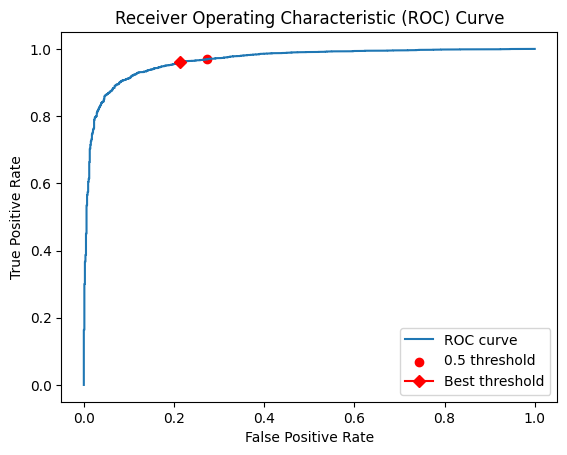

ANN AUC: 0.966


In [ ]:
# plot the ROC curve and the best point
plt.plot(fprs_ann, tprs_ann, label='ROC curve')
plt.scatter(x=fpr_ann, y=tpr_ann, marker='o', color='red', label='0.5 threshold')
plt.plot(fpr_bestThreshold, tpr_bestThreshold, marker='D', color='red', label='Best threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc_ann=metrics.auc(fprs_ann, tprs_ann)
print('ANN AUC:', '%.3f' % auc_ann)

### **3.3.3 Model comparison**

**Task 23:** Write code to show ROC curves of the lr and ann models 

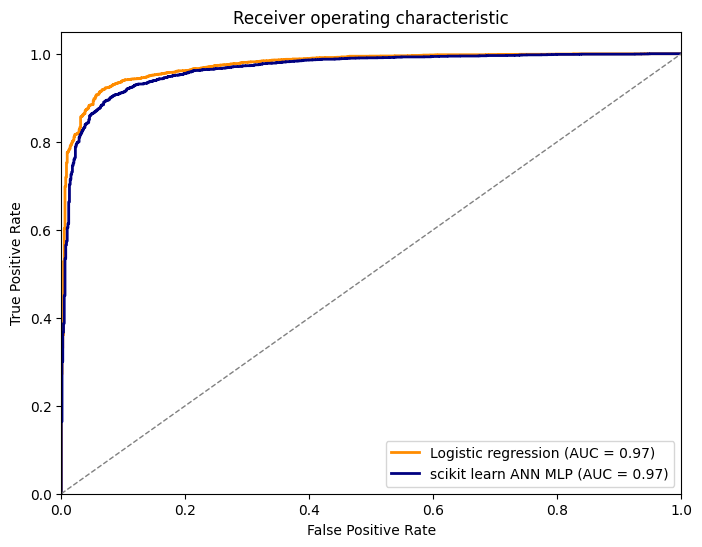

scikit-learn MLP AUC: 0.97
Keras MLP AUC: 0.97


In [ ]:
# Plot ROC curves





# Compute and print AUC
print('scikit-learn MLP AUC:','%.2f' %  auc_lr)
print('Keras MLP AUC:', '%.2f' %auc_ann)

# **Congratulations**

**Optional tasks:**

*   Compare and select a model. Explain your selection.
*   Write code to pickle your selected model. Don't forget to pickly the vocabulary as well. 
*   Collect additional review data from the Internet. Unpickle the model and use the model to conduct sentiment analysis. Report the findings. 
*   If you cannot find thr above data, maybe split the original dataset into Training, Test and Validation subsets. Then build and test a model using the first two datasets, pickle it and validate it with the Validation dataset.

